# Linear Discriminant Analysis

#### Introduction

* Supervised learning technique
* Used for dimensionality reduction
* Works on the principle of projecting data into a lower dimensional space with below goals
    * Reduce scatter within the class
    * Increase separation between classes
    
#### Caution

* Not to be confused with other LDA known as Latent Dirichlet Allocation - a technique used in Natural Language Processing (NLP)

#### History

* Ronald A. Fisher formulated the *Linear Discriminant* in 1936 ([The Use of Multiple  Measurements in Taxonomic Problems](http://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x/abstract)), and it also has some practical uses as classifier. 
* The original Linear discriminant was described for a 2-class problem, and it was then later generalized as "multi-class Linear Discriminant Analysis" or "Multiple Discriminant Analysis" by C. R. Rao in 1948 ([The utilization of multiple measurements in problems of biological classification](http://www.jstor.org/stable/2983775))

#### How does it differ from Principle Component Analysis (PCA)

* PCA is Unsupervised as it ignores class labels.
* Finds the directions (Principal Components) that maximize the variance in a dataset
* LDA is supervised and takes class labels into consideration
* Computes the directions (Linear Discriminants) that will represent the axes that that maximize the separation between multiple classes

![](images/lda_1.png)

#### How does LDA work?

Goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace $k$ (where $k \leq n-1$) while maintaining the class-discriminatory information.

In order to achieve the above goal, we follow below steps

* **Step 1.** Compute the $n$-dimensional mean vectors for the different classes from the dataset.
* **Step 2.** Compute the scatter matrices (in-between-class and within-class scatter matrix).
* **Step 3.** Compute the eigenvectors ($\pmb e_1, \; \pmb e_2, \; ..., \; \pmb e_n$) and corresponding eigenvalues ($\pmb \lambda_1, \; \pmb \lambda_2, \; ..., \; \pmb \lambda_n$) for the scatter matrices.
* **Step 4.** Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $n \times k$ dimensional matrix $\pmb W\;$ (where every column represents an eigenvector).
* **Step 5.** Use this $n \times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication $\pmb Y = \pmb X \times \pmb W$ (where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb y$ are the transformed $n \times k$-dimensional samples in the new subspace).

Let us consider couple of examples to demonstrate the application of LDA. In the first example, we will try to compute Linear Discriminants without using any API and also compute the Linear Discriminants with using Scikit Learn API.

### LDA on IRIS Data without using API

In [1]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',', 
    )

In [2]:
col_names = {i:label for i,label in zip(range(5), 
                                        ('sepal length in cm', 
                                         'sepal width in cm', 
                                         'petal length in cm', 
                                         'petal width in cm', 
                                         'class label'))}

In [3]:
df.columns = [l for i,l in sorted(col_names.items())]

# to drop the empty line at file-end
df.dropna(how="all", inplace=True)

# Printing dimensions of the DF
df.shape

(150, 5)

In [4]:
# Printing the head of the DF
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Printing the tail of the DF
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df = pd.DataFrame(df)
X = df.iloc[:, 0:4].values

In [15]:
y = df.iloc[:, 4].values

Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.

In [16]:
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

In [17]:
# After encoding Y values let us print
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [18]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
iris_setosa = df.loc[df["class label"]=="Iris-setosa"]
iris_virginica = df.loc[df["class label"]=="Iris-virginica"]
iris_versicolor = df.loc[df["class label"]=="Iris-versicolor"]

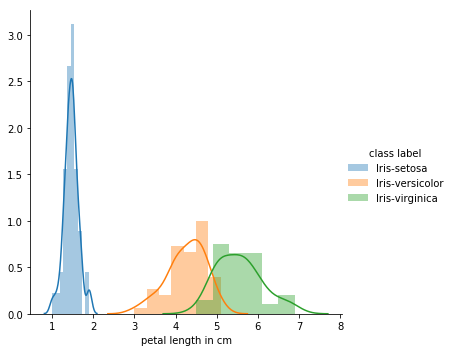

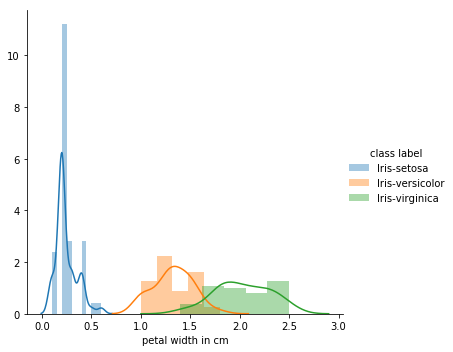

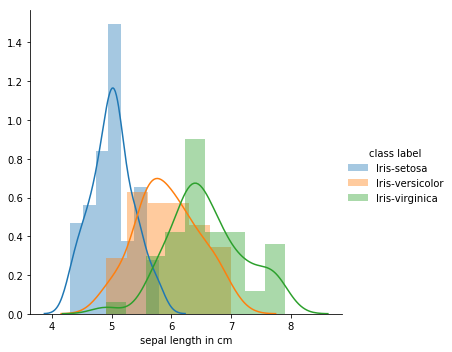

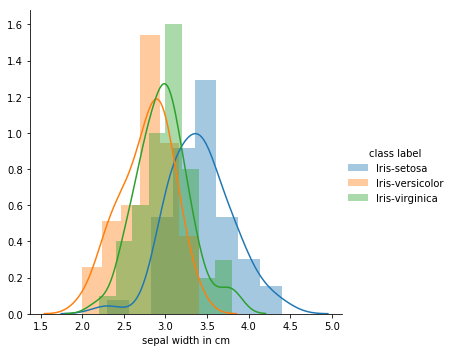

In [22]:
sns.FacetGrid(df, hue="class label", height=5).map(sns.distplot, "petal length in cm").add_legend()
sns.FacetGrid(df, hue="class label", height=5).map(sns.distplot, "petal width in cm").add_legend()
sns.FacetGrid(df, hue="class label", height=5).map(sns.distplot, "sepal length in cm").add_legend()
sns.FacetGrid(df, hue="class label", height=5).map(sns.distplot, "sepal width in cm").add_legend()

plt.show()

Looking at above figures we can say that the petal length and petal width are likely better suited as potential features to separate the three flower classes. 

Often times, instead of reducing the dimensionality via a projection, a good alternative would be a feature selection technique. For low-dimensional datasets like Iris, a glance at those histograms would already be very informative

#### Step 1: Compute the  n -dimensional mean vectors for the different classes from the dataset.

In this first step, we will start off with a simple computation of the mean vectors $\pmb m_i$, $(i = 1,2,3)$ of the 3 different flower classes:
    
$\pmb m_i = \begin{bmatrix} 
\mu_{\omega_i (\text{sepal length)}}\\ 
\mu_{\omega_i (\text{sepal width})}\\ 
\mu_{\omega_i (\text{petal length)}}\\
\mu_{\omega_i (\text{petal width})}\\
\end{bmatrix} \; , \quad \text{with} \quad i = 1,2,3$

In [23]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



####  Step 2: Computing the Scatter Matrices

#### Within the class Scatter Matrix

The **within-class scatter** matrix $S_W$ is computed by the following equation:  

$S_W = \sum\limits_{i=1}^{c}  S_i$

where  
$S_i = \sum\limits_{\pmb x \in D_i}^n (\pmb x - \pmb m_i)\;(\pmb x - \pmb m_i)^T$  
(scatter matrix for every class) 

and $\pmb m_i$ is the mean vector    
$\pmb m_i = \frac{1}{n_i} \sum\limits_{\pmb x \in D_i}^n \; \pmb x_k$

In [24]:
S_W = np.zeros((4,4))

for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


#### Between-class scatter matrix

The **between-class scatter** matrix $S_B$ is computed by the following equation:  

$S_B =  \sum\limits_{i=1}^{c} N_{i} (\pmb m_i - \pmb m) (\pmb m_i - \pmb m)^T$

where  
 $\pmb m$ is the overall mean, and $\pmb m_{i}$ and $N_{i}$ are the sample mean and sizes of the respective classes.

In [25]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


#### Step 3. Compute the eigenvectors ( ee1,ee2,...,een ) and corresponding eigenvalues ( λλ1,λλ2,...,λλn ) for the scatter matrices.

Let us solve the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$ to obtain the linear discriminants.

Both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

As we are performing the LDA for dimensionality reduction, the eigenvectors are important since they will form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how "informative" the new "axes" are.

In [26]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8844]
 [ 0.2854]
 [ 0.258 ]
 [ 0.2643]]
Eigenvalue 3: 3.42e-15

Eigenvector 4: 
[[-0.2234]
 [-0.2523]
 [-0.326 ]
 [ 0.8833]]
Eigenvalue 4: 1.15e-14


#### Step 4. Sort the eigenvectors by decreasing eigenvalues and choose  k  eigenvectors with the largest eigenvalues to form a  n×k  dimensional matrix  WW (where every column represents an eigenvector).

Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace). 

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.  

The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384003953
1.1483362279322388e-14
3.422458920849769e-15


#### Calculate the variance explained by each of Eigenvalues

In [32]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


#### Choosing *k* eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\pmb W$ (here $4 \times 2$: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [33]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


#### Step 5: Transforming the samples onto the new subspace

In the last step, we use the $4 \times 2$-dimensional matrix $\pmb W$ that we just computed to transform our samples onto the new subspace via the equation   

$\pmb Y = \pmb X \times \pmb W $.

(where $\pmb X$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\pmb Y$ are the transformed $n \times k$-dimensional samples in the new subspace).

In [34]:
X_lda = X.dot(W)
X_lda.shape

(150, 2)

#### VIsualizing data in lower dimensions

The scatter plot below represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant "LD1" separates the classes quite nicely. However, the second discriminant, "LD2", does not add much valuable information, which we've already concluded when we looked at the ranked eigenvalues is step 4.

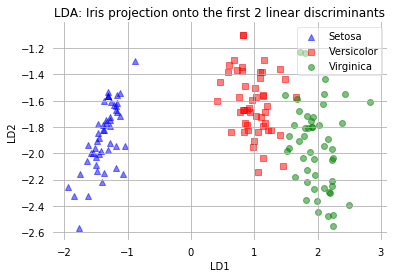

In [35]:
from matplotlib import pyplot as plt

def plot_step_lda():
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

### LDA on IRIS data using Scikit-Learn API

In below section we will use the API provided by scikit-learn package to perform Linear Discriminant Analysis

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [39]:
def plot_scikit_lda(X):
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):
        
        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])
  
    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('Default LDA via scikit-learn')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()

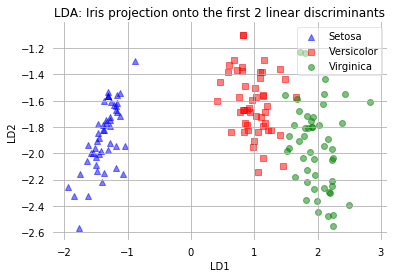

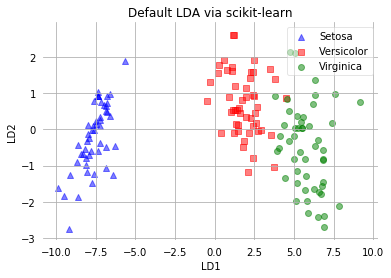

In [40]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn)

### Comparison with PCA

PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class seperability. In practice, often a LDA is done followed by a PCA for dimensionality reduction.

In [42]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)
    
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    plt.tight_layout
    plt.grid()
    
    plt.show()

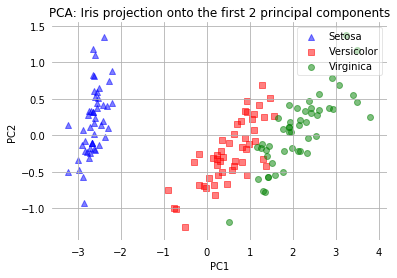

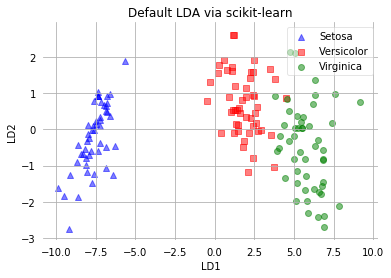

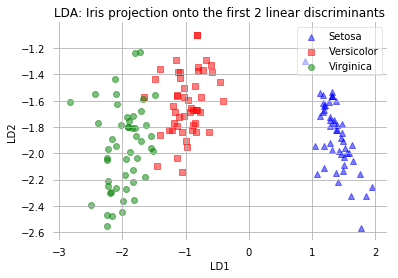

In [28]:
plot_pca()
plot_scikit_lda(X_lda_sklearn)
plot_step_lda()

#### Summary

* LDA is supervised technique for dimensionalityreduction

* Computes the directions (Linear Discriminants) that will represent the axes that that maximize the separation between multiple classes

* Feature Scaling / Standardization does not change the overall results of an LDA and thus may be optional.

* In practice, it is also not uncommon to use both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.

#### Conclusion

In the context of the appearance-based paradigm for object recognition, it is generally believed that algorithms based on LDA (linear discriminant analysis) are superior to those based on PCA (principal components analysis). In this communication, we show that this is not always the case. We present our case first by using intuitively plausible arguments and, then, by showing actual results on a face database. Our overall conclusion is that when the training data set is small, PCA can outperform LDA and, also, that PCA is less sensitive to different training data sets. 

For further details on above please look into ([PCA vs. LDA](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=908974), A.M. Martinez et al., 2001).